In [1]:
from fastai.vision import * 
from fastai import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/home/hoatruong/.fastai/data/mnist_sample')

In [3]:
path = Path('data/mnist_png/')

In [4]:
def create_head_sigmoid(nf:int, nc:int, lin_ftrs:Optional[Collection[int]]=None, ps:Floats=0.5):
    """Model head that takes `nf` features, runs through `lin_ftrs`, and about `nc` classes.
    :param ps: dropout, can be a single float or a list for each layer."""
    lin_ftrs = [nf, 512, nc] if lin_ftrs is None else [nf] + lin_ftrs + [nc]
    ps = listify(ps)
    if len(ps)==1: ps = [ps[0]/2] * (len(lin_ftrs)-2) + ps
    actns = [nn.Sigmoid()] * (len(lin_ftrs)-2) + [None]
    layers = [AdaptiveConcatPool2d(), Flatten()]
    for ni,no,p,actn in zip(lin_ftrs[:-1],lin_ftrs[1:],ps,actns):
        layers += bn_drop_lin(ni,no,True,p,actn)
    del(layers[-3])
    return nn.Sequential(*layers)

In [5]:
tfms = get_transforms(do_flip=False)
head = create_head_sigmoid(1024,8,lin_ftrs=[48])
data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=26)


In [6]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [6]:
learn = create_cnn(data, models.resnet18, custom_head=head, metrics=accuracy)

In [7]:
learn.fit_one_cycle(1,1e-3)

Total time: 03:24
epoch  train_loss  valid_loss  accuracy
1      0.376567    0.131907    0.971061  (03:24)



In [9]:
head

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Lambda()
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25)
  (4): Linear(in_features=1024, out_features=48, bias=True)
  (5): Sigmoid()
  (6): Dropout(p=0.5)
  (7): Linear(in_features=48, out_features=8, bias=True)
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


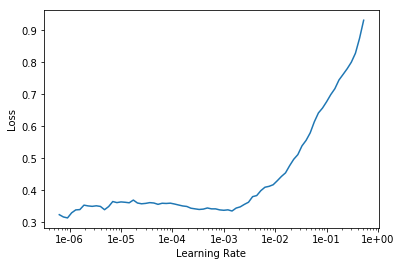

In [9]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 02:53
epoch  train_loss  valid_loss  accuracy
1      0.204517    0.055902    0.990271  (01:26)
2      0.200425    0.043574    0.992142  (01:26)



In [12]:
learn.save('test')

In [13]:
learn.load('test')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (48200 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: ImageItemList (48200 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data/mnist_png;
Valid: LabelList
y: CategoryList (8017 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: ImageItemList (8017 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: data/mnist_png;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stri